# Livestock Health Monitoring

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [128]:
df = pd.read_csv('livestock monitoring.csv')
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [129]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [130]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


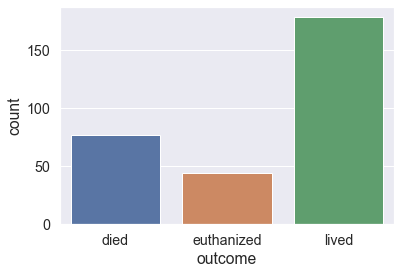

In [131]:
sns.countplot(data=df, x='outcome');

###  Among the 299 cases, about 75 cattles died and 40 were euthanized. We will study the condition of these cattles in this kernel.

# Surgery & Pain
### We will study the effects of surgery and pain. How many of the cattle which died underwent surgery and what level of pain did they feel?

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


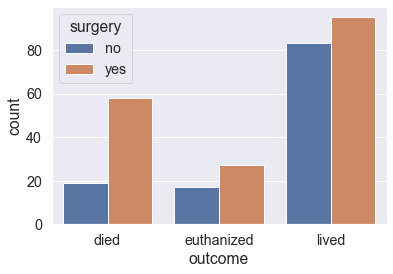

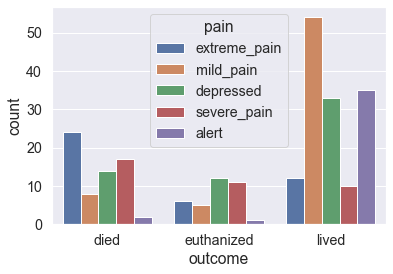

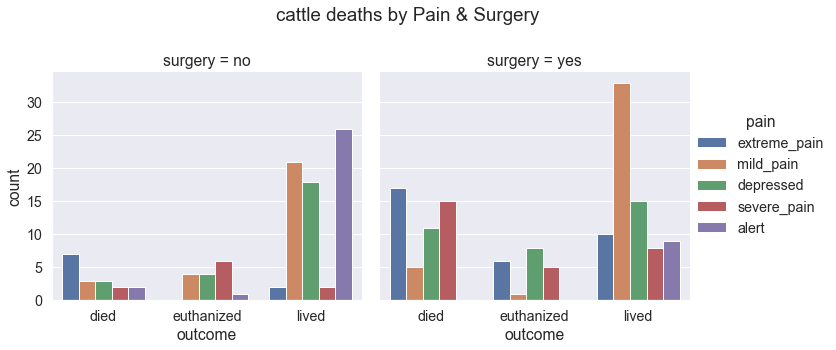

In [132]:
print(df.outcome.value_counts())

sns.countplot(data=df, x='outcome', hue='surgery');
plt.show()

sns.countplot(data=df, x='outcome', hue='pain');
plt.show()

g = sns.catplot(data=df, x='outcome', col='surgery', hue='pain', kind='count');
g.fig.suptitle('cattle deaths by Pain & Surgery');
plt.subplots_adjust(top=0.8)

### Only 20 of the 77 cattles that died underwent surgery. Were they neglected?
### About 18 cattle underwent surgery but were euthanized.
### A large majority of the cattle that died felt extreme or severe pain. While a majority of cattles that were euthanized experienced severe or depressed pain.

# Ciriculation

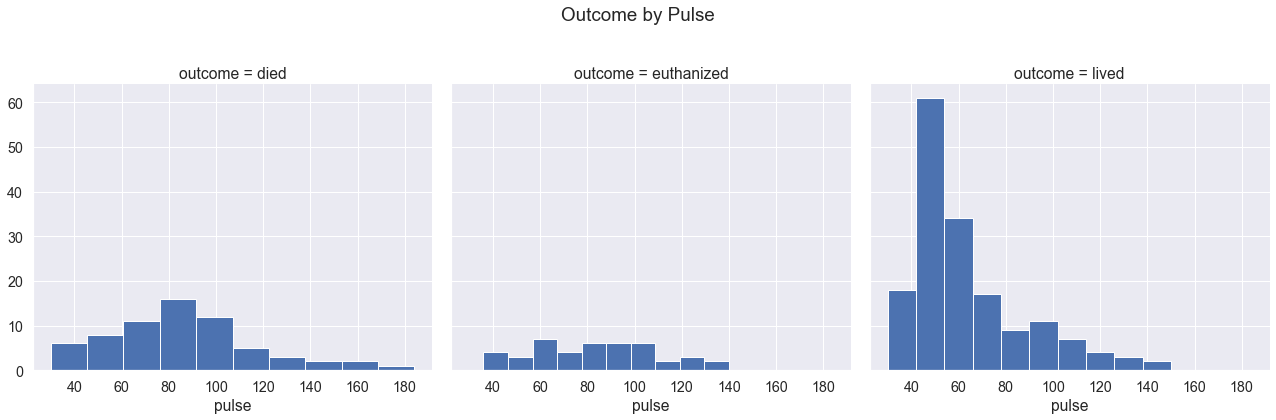

In [133]:
g = sns.FacetGrid(data=df, col='outcome', margin_titles=True, height=6)
g.map(plt.hist, 'pulse')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Outcome by Pulse');

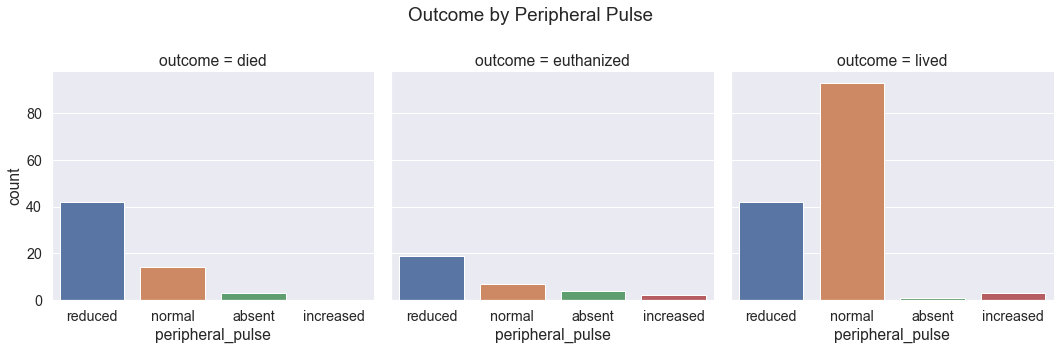

In [134]:
g = sns.catplot(data=df, x='peripheral_pulse', col='outcome', kind='count');
g.fig.suptitle('Outcome by Peripheral Pulse');
plt.subplots_adjust(top=0.8)

## Gut Health

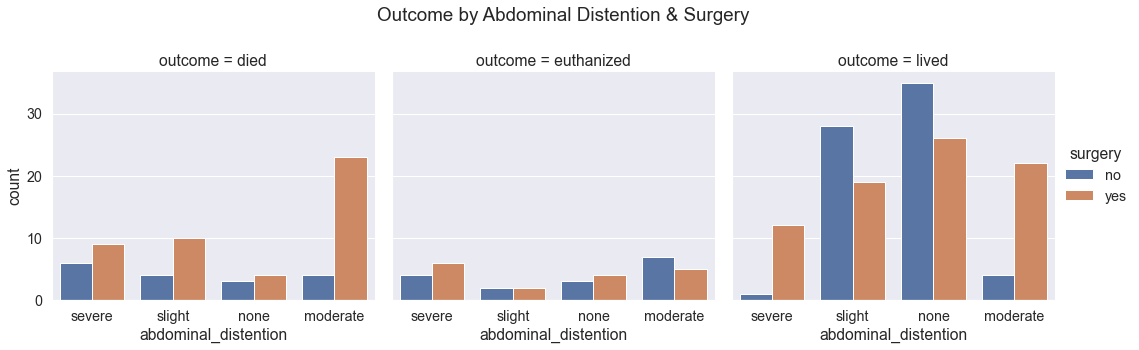

In [135]:
g = sns.catplot(data=df, x='abdominal_distention', col='outcome', hue='surgery', kind='count');
g.fig.suptitle('Outcome by Abdominal Distention & Surgery');
plt.subplots_adjust(top=0.8)

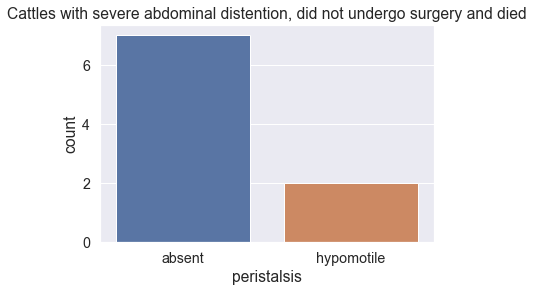

In [136]:
severe_died = df[df.outcome.isin(('died','euthanized')) & (df.abdominal_distention=='severe') & (df.surgery=='no')]

g = sns.countplot(data=severe_died, x='peristalsis').set_title('Cattles with severe abdominal distention, did not undergo surgery and died');

### We were given the information that when there is Abdominal Distention, a surgery is necessary to alleviate the condition. A large proportion of Cattles with severe distention that died had not undergone surgery.
### Meanwhile, a large proportion of Cattles with severe distention that survived had undergone surgery.
### Of the 9 Cattle with severe distention that did not undergo surgery and died, 7 had an absent peristalsis. That was the sign of a compromised gut.

In [137]:
df.isnull().any()

surgery                  False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph     True
rectal_exam_feces         True
abdomen                   True
packed_cell_volume        True
total_protein             True
abdomo_appearance         True
abdomo_protein            True
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [138]:
#let's count the mising values from each features
null = df.isnull().sum() #Count the missing value
#let's see the missing values in percetange format
null = null/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
temp_of_extremities      18.729097
abdominal_distention     18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
dtype: float64

In [139]:
# rectal_temp
df.rectal_temp = df.rectal_temp.fillna(value=df.rectal_temp.mode()[0])

In [140]:
# pulse
df.pulse = df.pulse.fillna(value=df.pulse.mean())

In [141]:
# respiratory_rate
df.respiratory_rate = df.respiratory_rate.fillna(value=df.respiratory_rate.mean())
# abdomo_protein
df.abdomo_protein = df.abdomo_protein.fillna(value=df.abdomo_protein.mode()[0])
# total_protein
df.total_protein = df.total_protein.fillna(value=df.total_protein.mean())

In [142]:
# packed_cell_volume
df.packed_cell_volume = df.packed_cell_volume.fillna(value=df.packed_cell_volume.mean())
# nasogastric_reflux_ph
df.nasogastric_reflux_ph = df.nasogastric_reflux_ph.fillna(value=df.nasogastric_reflux_ph.mean())

In [143]:
#filling all object data type with their mode values
col = null.index
for i in col:
    df[i] = df[i].fillna(df[i].mode()[0])

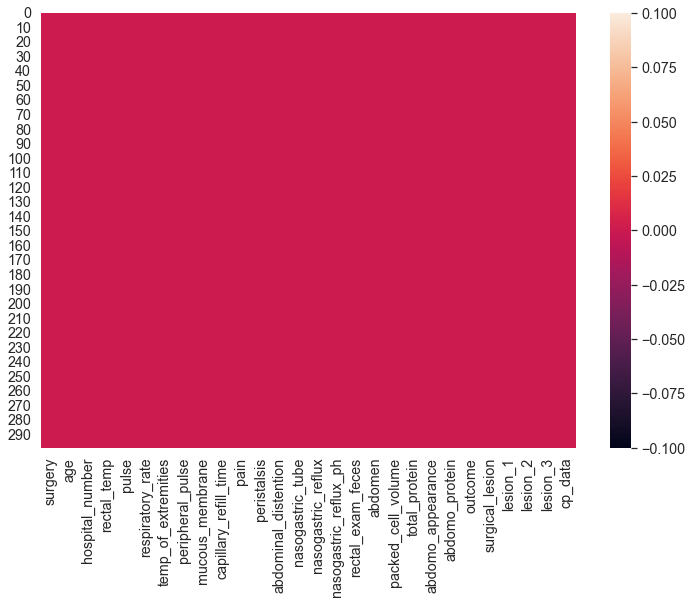

In [144]:
#let's check there is missing value or not throught plot
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull())
plt.show()

In [145]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
col = df.columns
for i in col:
    lb = LabelEncoder()
    lb.fit(df[i].values)
    df[i] = lb.transform(df[i].values)

# Analysis on Target variable.
## In this dataset, target varible is outcome

In [146]:
#count the Classifing values
df.outcome.value_counts()

2    178
0     77
1     44
Name: outcome, dtype: int64

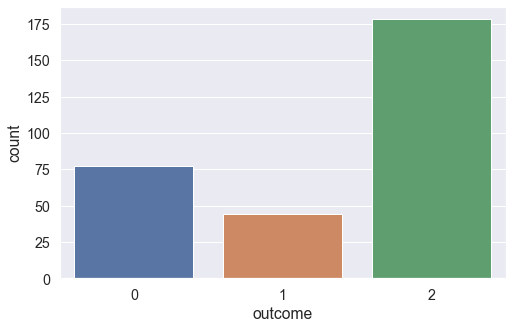

In [147]:
#plotint of above count
plt.figure(figsize=(8, 5))
sns.countplot(x='outcome',data=df)
plt.show()

In [148]:
#Separate data into feature and target
X = df.drop('outcome', axis=1).values
y = df['outcome'].values

In [149]:
#split the data into train and test perpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Applying alogrithm


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [154]:
algo = {'LR':LogisticRegression(),
        'DT':DecisionTreeClassifier(),
        'RFC':RandomForestClassifier(n_estimators=100),
        'SVM':SVC(gamma=0.001),
        'KNN':KNeighborsClassifier(n_neighbors=10)}

In [155]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))

Acurracy of LR is 73.33
Acurracy of DT is 70.00
Acurracy of RFC is 78.33
Acurracy of SVM is 76.67
Acurracy of KNN is 75.00


## Here, Maximum accuracy is Random Frorest . So, I make here confusion matrix of RFC

In [118]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

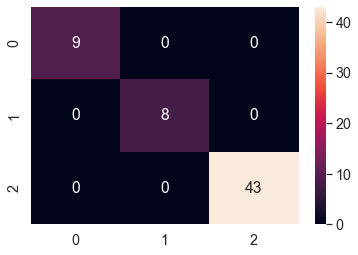

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
sns.set(font_scale=1.3)
sns.heatmap(cm, annot=True)
plt.show()

In [120]:
print("Prediction value " + str(model.predict([X_test[3]])))
print("Real value " + str(y_test[3]))

Prediction value [0]
Real value 0


## 'died':0, 'euthanized':1, 'lived':2